In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are No missing values in dataset

In [5]:
df.duplicated().sum()

0

### There are no duplicate values as well in the dataset

In [6]:
###To check the datatypes of the info available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### We can clearly observe that there are 3 integer values mainly representing the marks of the students Rest all are like categorical features about the student 

In [7]:
print(f"Number of unique values in the Given dataset are:\n{df.nunique()}")

Number of unique values in the Given dataset are:
gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Lets now see what are the unique features in each columns

In [10]:
print(f"Categories in 'Gender' column are: {df['gender'].unique()} ")
print(f"Categories in 'race_ethnicity' column are: {df['race_ethnicity'].unique()} ")
print(f"Categories in 'parental_level_of_education' column are: {df['parental_level_of_education'].unique()} ")
print(f"Categories in 'lunch' column are: {df['lunch'].unique()} ")
print(f"Categories in 'test_preparation_course' column are: {df['test_preparation_course'].unique()} ")

Categories in 'Gender' column are: ['female' 'male'] 
Categories in 'race_ethnicity' column are: ['group B' 'group C' 'group A' 'group D' 'group E'] 
Categories in 'parental_level_of_education' column are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
Categories in 'lunch' column are: ['standard' 'free/reduced'] 
Categories in 'test_preparation_course' column are: ['none' 'completed'] 


## Now We will visualise which are categorical and which are numerical features

In [11]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
num_features=[feature for feature in df.columns if df[feature].dtype!='O']

print(f"We have {len(cat_features)} categorical features they are: {cat_features}")
print(f"We have {len(num_features)} numerical features they are: {num_features}")

We have 5 categorical features they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 3 numerical features they are: ['math_score', 'reading_score', 'writing_score']


#### Now let's add two new columns the average marks column and total marks column simple isn't it?

In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=(df['total_score']/3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [13]:
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()
print(f"The number of students who have scored full marks in maths are: {math_full}")
print(f"The number of students who have scored full marks in reading are: {reading_full}")
print(f"The number of students who have scored full marks in writing are: {writing_full}")

The number of students who have scored full marks in maths are: 7
The number of students who have scored full marks in reading are: 17
The number of students who have scored full marks in writing are: 14


In [14]:
reading_lt20=df[df['reading_score']<=20]['average_score'].count()
writing_lt20=df[df['writing_score']<=20]['average_score'].count()
math_lt20=df[df['math_score']<=20]['average_score'].count()
print(f"The number of students who have scored less than 20 in maths are: {math_lt20}")
print(f"The number of students who have scored less than 20 in reading are: {reading_lt20}")
print(f"The number of students who have scored less than 20 in writing are: {writing_lt20}")

The number of students who have scored less than 20 in maths are: 4
The number of students who have scored less than 20 in reading are: 1
The number of students who have scored less than 20 in writing are: 3


<Axes: xlabel='average_score', ylabel='Count'>

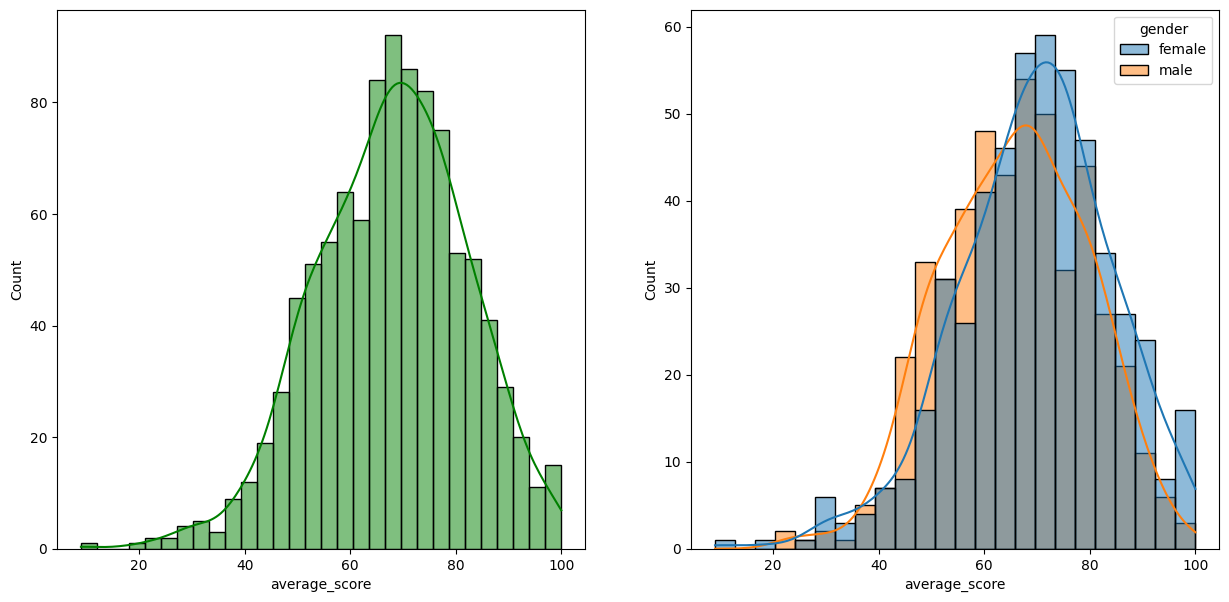

In [15]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

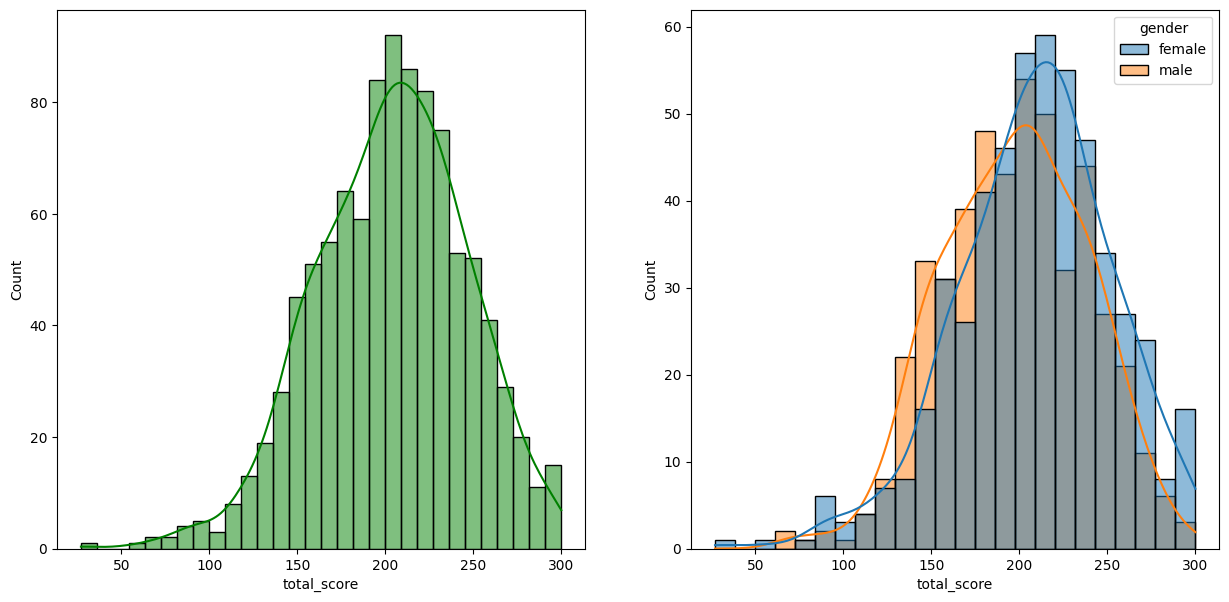

In [16]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')